# Proposition 3.3

### General properties of the Quaternionic Fourier Matrix.

In [1]:
import numpy as np 
import quaternion
from quaternion_matrix import quatmatmul_matrix_by_vector, quatmatmul_matrix_by_matrix
from quaternion_circulant_matrix import create_qft_matrix
from quaternion_symplectic import qfft, iqfft, vis
np.set_printoptions(precision=2, suppress=True)  # for compact output

α. $Q^\mu_N$ is square, Vandermonde ie, all rows are formed as geometric progressions, and symmetric.


Creating a QFT matrix of size 128x128 with axis =quaternion(0, -0.323143677390029, 0.786486273365011, 0.526324524957051).


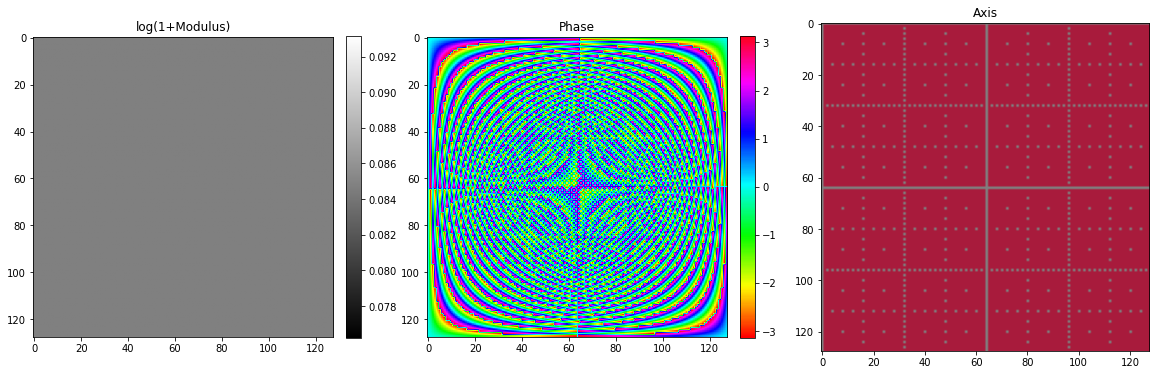

In [2]:
N = 128
mu = np.quaternion(0, np.random.randn(), np.random.randn(), np.random.randn()).normalized() # Axis must be a pure unit quaternion
print('Creating a QFT matrix of size {}x{} with axis ={}.'.format(N, N, mu))
Q = create_qft_matrix(N, mu)
vis(Q, visualization_style='polar')

β. $[Q^\mu_N]^H Q^\mu_N = Q^\mu_N [Q^\mu_N]^H = I$ ($Q^\mu_N$ is unitary).

Creating a QFT matrix of size 4x4 with axis =quaternion(0, -0.323143677390029, 0.786486273365011, 0.526324524957051).


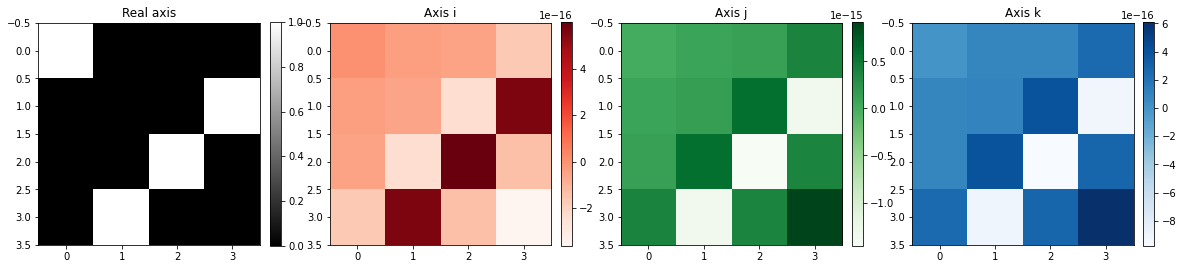

"\nprint('The Fourier matrix.')\nvis(Q4)\nprint('The conjugate transpose of the Fourier matrix.')\nvis(Q4H)\nprint('The product of the Fourier by the conjugate Fourier matrix (equal to the identity, +- numerical error)')\nvis(quatmatmul_matrix_by_matrix(Q4, Q4H), visualization_style='channelwise')\nprint('The product of the conjugate Fourier by the Fourier matrix (equal to the identity, +- numerical error)')\nvis(quatmatmul_matrix_by_matrix(Q4, Q4H), visualization_style='channelwise')\n"

In [3]:
N=4
print('Creating a QFT matrix of size {}x{} with axis ={}.'.format(N, N, mu))
Q4 = create_qft_matrix(N, mu)
Q4H = Q4.conj().T
vis(quatmatmul_matrix_by_matrix(Q4, Q4), visualization_style='channelwise')
'''
print('The Fourier matrix.')
vis(Q4)
print('The conjugate transpose of the Fourier matrix.')
vis(Q4H)
print('The product of the Fourier by the conjugate Fourier matrix (equal to the identity, +- numerical error)')
vis(quatmatmul_matrix_by_matrix(Q4, Q4H), visualization_style='channelwise')
print('The product of the conjugate Fourier by the Fourier matrix (equal to the identity, +- numerical error)')
vis(quatmatmul_matrix_by_matrix(Q4, Q4H), visualization_style='channelwise')
'''

γ. The product $Q^\mu_N x$, where $x \in H^N$, equals the *left* QFT $F^{\mu}_L \{ x \}$

In [5]:
N = 2000
qft_axis = np.quaternion(0, 1, 1, 1).normalized()
Q = create_qft_matrix(N, axis=qft_axis)
x = np.zeros([N,], dtype=np.quaternion)
for i in range(N):
    x[i] = np.quaternion(i, -i, 2, 5*i+3)
res1 = quatmatmul_matrix_by_vector(Q, x)
res2 = qfft(x, qft_axis=qft_axis, apply_shift=False)
print('The two results differ in total by a magnitude of {}.'.format(np.sum(np.abs(res1 - res2))))

The two results differ in total by a magnitude of 3.6796497540917855e-06.


δ. The product $\overline{Q}^\mu_N x = Q^{-\mu}_N x$, where $x \in Η^N$, equals the *left* inverse QFT $F^{-\mu}_L \{ x \}$ .

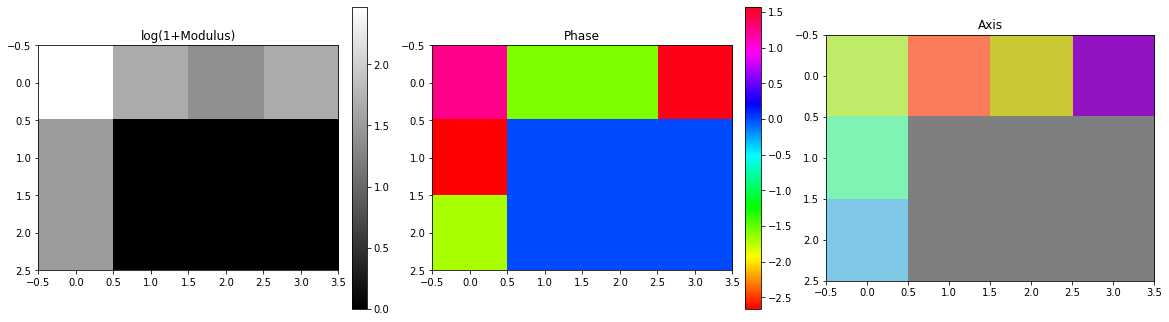

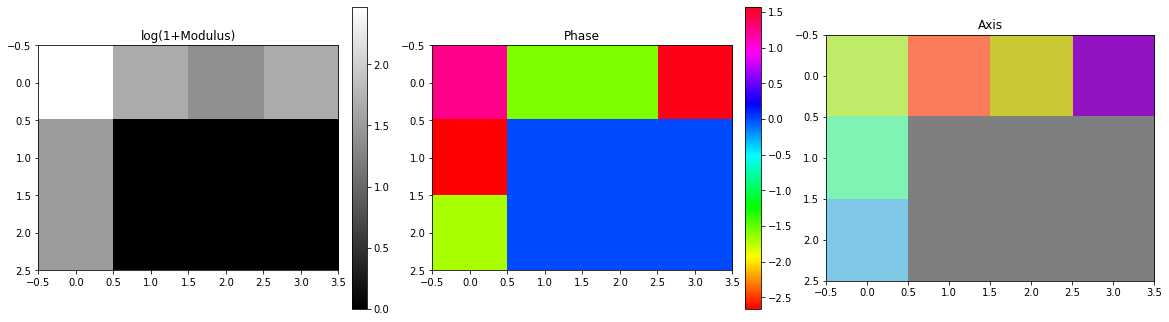

In [6]:
Q = np.zeros([3, 4], dtype=np.quaternion)
for i in range(Q.shape[0]):
    for j in range(Q.shape[1]):
        Q[i, j] = np.quaternion(i, j, i+j, i-j)
mu = np.quaternion(0, 1, 2, 3).normalized()
#Shifting shouldn't be applied, as inverse and forward implementation shift towards inverse directions.
Q1 = qfft(Q, qft_axis=mu, apply_shift=False)
Q2 = iqfft(Q, qft_axis=-mu, apply_shift=False)
# The result should be identical, as per the proposition.
vis(Q1)
vis(Q2)


In [7]:
# Same but for 1D signals.
Q = np.zeros([5, ], dtype=np.quaternion)
for i in range(Q.shape[0]):
    Q[i] = np.quaternion(i, 2*i, 0, -i)
mu = np.quaternion(0, 1, 2, 3).normalized()
#Shifting shouldn't be applied, as inverse and forward implementation shift towards inverse directions.
Q1 = qfft(Q, qft_axis=mu, apply_shift=False)
Q2 = iqfft(Q, qft_axis=-mu, apply_shift=False)
print(Q1)
print(Q2)


[quaternion(4.47213595499958, 8.94427190999916, 2.74726986831249e-16, -4.47213595499958)
 quaternion(-0.706761226570454, -2.64734073967923, 3.70145485961497, 0.706761226570454)
 quaternion(-1.02094565958144, -2.33315630666824, 0.873794962516073, 1.02094565958144)
 quaternion(-1.21512231791835, -2.13897964833134, -0.873794962516073, 1.21512231791835)
 quaternion(-1.52930675092934, -1.82479521532035, -3.70145485961497, 1.52930675092934)]
[quaternion(4.47213595499958, 8.94427190999916, 2.74726986831249e-16, -4.47213595499958)
 quaternion(-0.706761226570454, -2.64734073967923, 3.70145485961497, 0.706761226570454)
 quaternion(-1.02094565958144, -2.33315630666824, 0.873794962516073, 1.02094565958144)
 quaternion(-1.21512231791835, -2.13897964833134, -0.873794962516073, 1.21512231791835)
 quaternion(-1.52930675092934, -1.82479521532035, -3.70145485961497, 1.52930675092934)]


ε. $Q^i_N = A_N$ where $A_N$ is the (standard, non-quaternionic) Fourier matrix of size $N$.

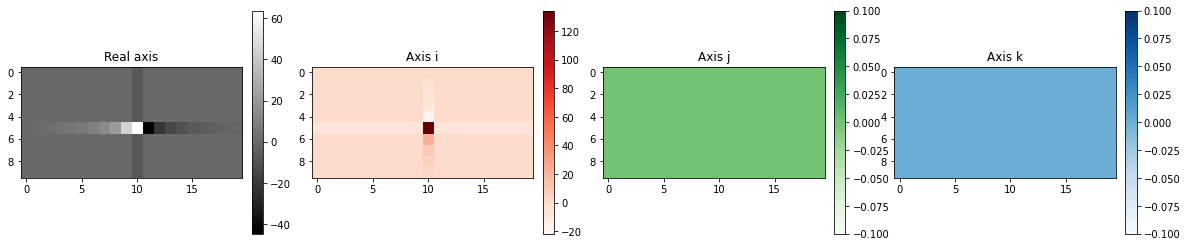

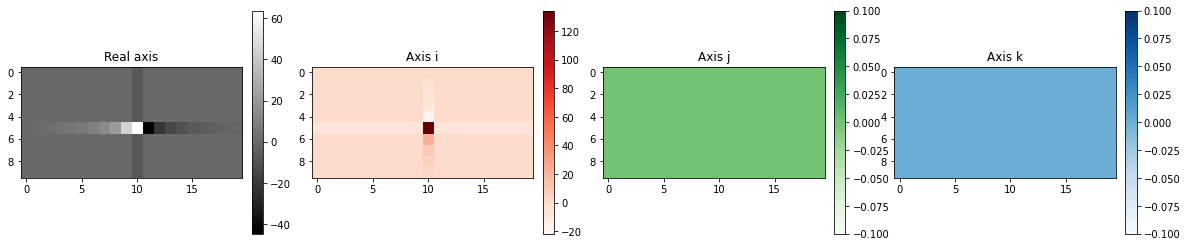

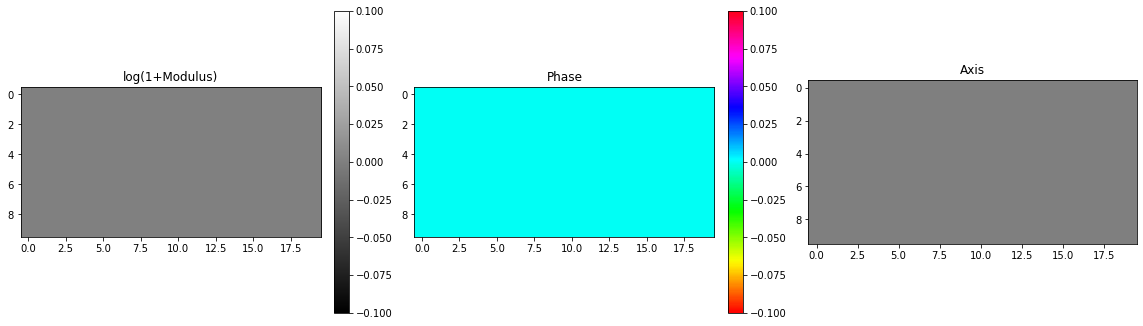

In [8]:
# The proposition itself can be checked by comparing definitions of standard and quaternion fourier matrices.
# This code combines this proposition with the result which says that the product of a fourier matrix
# results to the fourier transform.
M = 10
N = 20
Q = np.zeros([M, N], dtype=np.quaternion)
Qcomplex = np.zeros([M, N], dtype=np.complex64)
for i in range(Q.shape[0]):
    for j in range(Q.shape[1]):
        # Create a complex-valued matrix, but cast as a quaternion matrix.
        Q[i, j] = np.quaternion(i, j, 0, 0)
        Qcomplex[i, j] = i + j*1j
Q_qfft = qfft(Q, np.quaternion(0, 1, 0, 0), apply_shift=True)
Q_standardfft = np.fft.fftshift(np.fft.fft2(Qcomplex, norm='ortho'))
R = np.zeros([M, N, 4])
R[:, :, 0] = np.real(Q_standardfft)
R[:, :, 1] = np.imag(Q_standardfft)
res = quaternion.as_quat_array(R)
vis(Q_qfft, visualization_style='channelwise')
vis(res, visualization_style='channelwise')
vis(Q_qfft - res)

ζ. $Q^{\mu}_N Q^{\mu}_N = \check{P}$, where $\check{P}$ is a permutation matrix that maps column $n$ to $[N-n]_N$.

In [9]:
##
# The resulting permutation matrix has at most 2 non-zero elements in its diagonal,
# and at most 4 non-zero elements in its diagonal when we deal with Q kron Q.
# The latter case is important for doubly-block circulant matrices.
M, N = 5, 5
qft_axis = np.quaternion(0, 1, 1, 1).normalized()
QM = create_qft_matrix(M, axis=qft_axis)
QN = create_qft_matrix(N, axis=qft_axis)
R = np.kron(QM, QN)
tt = quatmatmul_matrix_by_matrix(R, R)
ttF = quaternion.as_float_array(tt)[..., 0]
diagonal_elements = np.diag(tt)
print(f'The diagonal of R*R has {np.uint8(np.round(np.sum((quaternion.as_float_array(diagonal_elements)[..., 0]))))} non-zero elements.')
# The permutation defined by this result is...
perm = []
for i in range(tt.shape[0]):
    zz = np.where(ttF[i, :] > 0.5)
    perm.append(zz[0][0])

print(perm)

The diagonal of R*R has 1 non-zero elements.
[0, 4, 3, 2, 1, 20, 24, 23, 22, 21, 15, 19, 18, 17, 16, 10, 14, 13, 12, 11, 5, 9, 8, 7, 6]
